In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

#### 16.1.2 區間估計

區間估計用一個包括有真實值的區間範圍來估計參數的取值範圍，得到的結果為信賴區間（Confidence Interval）。區間估計的可信程度稱為信心水準（Confidence Level），一般為用$1-\alpha$表示（$\alpha$取值大小由實際問題確定，經常取1%、5%、10%），用數學表示信賴區間為：

$$\mathrm{Pr}(\theta_1\le\theta\le\theta_2)=1-\alpha$$

我們稱區間 $[\theta_1,\theta_2]$ 是參數 $\theta$ 信心水準為 $1-\alpha$ 的信賴區間。

# 還沒寫

##### 進行區間估計的 Python 函數

Python 中 stats 模組的 t 類別的 interval() 函數用於母體變異數未知時進行區間估計。它的函數形式是：

`1. interval(alpha, df, loc, scale)`

* alpha為信心水準；


* df是檢定量的自由度；


* loc為樣本均值；


* scale為標準差。

下面我們來看一個例子。假設我們需要估計一件物品的重量，對這個物品稱重 10 次，得到的重量為：

`1. 10.1, 10, 9.8, 10.5, 9.7, 10.1, 9.9, 10.2, 10.3, 9.9`

假設所稱出的物體重量服從常態分佈，我們可以用 interval() 求重量的信心水準為 0.95 的信賴區間。

In [2]:
from scipy import stats
import numpy as np

# 構造樣本重量 x
x=[10.1, 10, 9.8, 10.5, 9.7,\
   10.1, 9.9, 10.2, 10.3, 9.9]

# 進行區間估計
# np.mean(x)用於求x的均值
# stats.sem(x)用於求樣本均值的標準誤，
# 樣本均值服從t分佈，樣本均值的標準差為標準誤，
# 在區間估計時，用標準誤來表示樣本均值的標準差。
stats.t.interval(0.95,len(x)-1,\
                np.mean(x),stats.sem(x))

(9.877224892797548, 10.222775107202454)

t.test() 函數返回的結果可以得出，在信心水準為 0.95 下，均值信賴區間為[9.877225,10.222775]。

### 16.2 案例分析

**台灣加權指數收益率均值的參數估計** 若想估計台灣加權指數收益率的均值，我們首先需要知道台灣加權指數收益率服從什麼類型的概率分佈。對於這個問題，可以透過繪製直方圖來解決。

,CO_ID,CoName,Date,ROI
Date,,,,
2014-01-02,Y9999,TSE Taiex,2014/01/02,0.0120
2014-01-03,Y9999,TSE Taiex,2014/01/03,-0.7663
2014-01-06,Y9999,TSE Taiex,2014/01/06,-0.5444


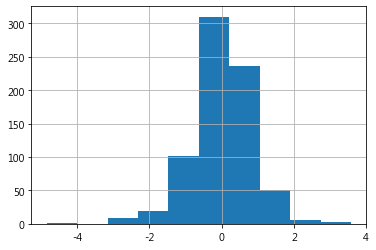

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
# 修復負號顯示問題
plt.rcParams['axes.unicode_minus'] = False

# 讀取數據
import pandas as pd
TRD_Index=pd.read_table('.\PythonBook_code_data\part2\index.csv',sep='\t')
TRD_Index.index = pd.to_datetime(TRD_Index.Date)

# 提取台灣加權指數的收益率指數序列
Taiex=TRD_Index[TRD_Index.CoName=='TSE Taiex    ']
Taiex.head(3)

# 繪製台灣加權指數收益率的直方圖
TaiexRet = Taiex.ROI.astype(np.float)
TaiexRet.hist()
plt.show()

圖 16.1 展示而來台灣加權指數收益率的分佈。可以看到台灣加權指數收益率的分佈大致呈現出一個對稱的鐘形形狀。因此，我們可以猜測台灣加權指數收益率服從常態分佈。

為了驗證這個猜測，首先運用動差估計來得到均值和變異數的點估計值，母體的均值和變異數的動差估計值分別為樣本的均值和變異數。然後，繪製出以這兩個估計值為均值和變異數的常態分佈的概率密度函數圖，並與原始數據的頻數分佈值方圖作比較，驗證假設是否合理。

(array([0.00161438, 0.        , 0.01452943, 0.03067325, 0.1646669 ,
        0.50045823, 0.380994  , 0.08071907, 0.00968629, 0.00484314]),
 array([-4.8361 , -3.99448, -3.15286, -2.31124, -1.46962, -0.628  ,
         0.21362,  1.05524,  1.89686,  2.73848,  3.5801 ]),
 <a list of 10 Patch objects>)

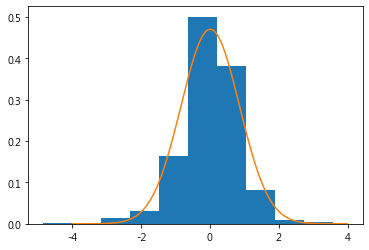

In [4]:
# 求出台灣加權值數的收益率的均值
mu=TaiexRet.mean()

# 求出台灣加權值數的收益率的標準差
sigma=TaiexRet.std()

import matplotlib.pyplot as plt
# normed=True 表示在直方圖上添加常態分佈曲線
# plt.hist(TaiexRet,normed=True) ## 新版的matplotlib改用density=True
plt.hist(TaiexRet,density=True)
plt.plot(np.arange(-4,4,0.002),\
         stats.norm.pdf(np.arange(-4,4,0.002),\
         mu,sigma))

觀察圖 16.2 中，台灣加權指數收益率分佈極其常態分佈擬和線，可以簡單推測出台灣加權指數收益率常態分佈的假設基本是合理的。

台灣加權指數收益率服從常態分佈的前提下，進行均值的區間估計。

In [5]:
# 進行區間估計
stats.t.interval(0.95,len(TaiexRet)-1,mu,stats.sem(TaiexRet))

(-0.04804637316047405, 0.07479555794308274)

根據估計的結果，可以得出信心水準為 0.95 時，台灣加權指數收益率的信賴區間為 $[-0.0480\%,0.2748\%]$。

### 16.3 假設檢定

除了參數估計，推論統計還有一種重要的方法，那就是假設檢定（Hypothesis Test）。參數估計的主要任務在猜測參數的取值，而假設檢定的著重點在於檢定參數的取值是否等於某個目標值。

假設檢定一般具有兩個隱含的思想：小概率事件思想和反證法的思想。

* 小概率事件思想：小概率事件在一次實驗中幾乎是不發生的。如果我們的假設下，出現了一個小概率事件，那麼我們就可以認為我們的假設是錯誤的。


* 反證法思想：先假設我們提出的假設是正確的，然後在該條件下檢定觀測到的事件是不是小概率事件。如果是，那們我們就可以否定我們的假設；否則，我們就無法否定。

一般來說假設檢定有以下基本步驟：

1. 先根據實際問題的要求提出一個論斷，稱為虛無假設或零假設（Null Hypothesis），記為 $H_0$。同時提出一個互為反命題的對立假設（Alternative Hypothesis），記為 $H_1$。


2. 然後在 $H_0$ 正確的條件下，求出樣本數據出現的概率，看我們手中的樣本是不是小概率事件[<sup> 2</sup>](#fn2)。


3. 最後，如果樣本是小概率事件，那麼我們就認為虛無假設是錯誤的。在統計學上，我們稱之為拒絕虛無假設。否則，我們就不能拒絕 $H_0$ 的決策。對於虛無假設和對立假設有以下的選擇原則：

 * 虛無假設應該是受到保護的，不應輕易被拒絕；
 
 * 對立假設是檢定者所希望的結果；

 * 等號永遠出現在虛無假設中。
 
假設檢定的一個步驟是判斷樣本是不是一個小概率事件，但是，什麼樣的事件才是小概率事件呢？或者說，多小的概率是多少才算是小概率？為了回答這個問題，我們先來看一下假設檢定中會出現的兩類錯誤。

<span id="fn2"><sup>2</sup> 抽樣是具有隨機性的，每一次取得的樣本都不一樣。因此，每一種樣本都有其出現的概率。</span>

#### 16.3.1 兩類錯誤

##### 第一類錯誤（Type I Error）

在假設檢定中拒絕的本來是正確的虛無假設（棄真）。

在小概念事件思想，我們認為一個小概率事件是幾乎不可能發生的。因此，只要出現小概率事件，我們就認為虛無假設是錯誤的。但是，只要其概率不等於 0，那麼事件就有可能發生。也就是說，我們仍有可能遇到了一個小概率事件。在這種情況下，虛無假設是正確的。但是，根據小概率事件思想，我們卻會拒絕虛無假設。這樣，我們的假設檢定就犯錯了，盡管出現這樣的情況的概率非常小。這種錯誤就是第一類錯誤，犯第一類錯誤的概率記為 $\alpha$。

##### 第二類錯誤（Type II Error）

在假設檢定中沒有拒絕本來是錯誤的虛無假設（取偽）。

有的時候，我們也會遇到沒有拒絕錯誤的虛無假設的狀況，尤其是我們的虛無假設錯誤但卻很接近真實值的時候。例如說，假設母體的實際均值為 10，而我們的虛無假設是母體均值為 9.5。這時候，如果取得的樣本的均值為 9.5，那麼虛無假設是不會被拒絕的。但是，這種虛無假設卻是錯誤的。所以，假設檢定也會存在沒有拒絕錯誤的虛無假設的錯誤。這種錯誤被稱為第二類錯誤，犯第二類錯誤的概率記為 $\beta$。

在假設檢定中，這兩種錯誤都難以避免。例如說，當我們對一個常態分佈的均值進行假設檢定時。理論上，由於常態分佈取值範圍為所有的實數，樣本均值可能是任意一個實數。也即是說，不管樣本均值是多少。其出現的概率都不為 0。這樣，如果我們想讓 $\alpha$ 為 0，那們我們在任何情況下都不能拒絕虛無假設。很明顯，這樣就失去的假設檢定的意義。另外一個問題是，我們往往無法同時控制兩個錯誤發生的概率，即犯第一類錯誤和第二類錯誤的概率無法同時變小。這點從直覺上就很容易理解。如果我們想要降低 $\alpha$，那麼我們就需要提高拒絕的條件，使得虛無假設更不容易被拒絕。但設，這樣一來，也就使得錯誤的虛無假設更不容易被發現，因此而提高了 $\beta$。所以，我們通常需要權衡這兩個錯誤，選擇一個合適的拒絕條件。一般來說，我們選擇控制 $\alpha$，不限制 $\beta$。

#### 16.3.2 顯著性水平與 $p$ 值

為了控制 $\alpha$，我們往往將 $\alpha$ 的值固定，同時使得

$$\mathrm{P}(拒絕H_0|H_0為真)\le\alpha$$

在統計學上，我們賦予 $\alpha$ 一個專門的名稱，叫顯著性水平（Significance Level）。常見的顯著性水平有 0.1、0.05 或 0.01。

為了確定一個事件是不是小概率事件，我們需要求解事件發生的概率。但是，對於連續型變數來說，某個具體取值的概率為 0。所以，我們無法直接算出事件發生的概率。為了解決這個問題，我們採取另一個方法。使用這個方法時，我們算出在虛無假設正確的條件下，和當前樣本一樣極端或更極端的情況出現的概率。所謂的更極端的情況，指的是樣本參數和虛無假設的偏差，比現在的樣本參數和虛無假設的偏差還要更大的情況。例如說，虛無假設是母體均值為 10，樣本的均值為 9，樣本均值與虛無假設的差即為 -1。那麼，更極端的情況就是指均值和 10 的差大於 1 或小於 -1 的樣本。而一樣的極端則是指樣本參數和虛無假設的偏差一樣的情況。我們把所得到的樣本或更極端的情況出現的概率叫做 $p$ 值（$p$ -value）。在上面的例中子，$p$ 值就是得到均值小於等於 9 或者大於等於 11 的樣本的概率。

#### 16.3.3  確定最小概率事件

整體而言，在假設檢定中，判斷小概率事件的一個基本原則是：當 $p$ 值小於等於 $\alpha$ 時，我們的樣本為最小概率事件。而對於 $p$ 值與 $\alpha$ 的比較，可以採取兩種方法：臨界值檢定法（Critical Value Approach）和顯著性檢定法（$p$ -value Approach）。

##### 臨界值檢定法

在使用臨界值檢定法時，首先使用樣本數據建構一個用於檢定的統計量，這個統計量往往是母體參數的點估計量。然後，我們需要確定能夠拒絕虛無假設的最大 $p$ 值。根據小概率事件判斷原則，這個最大值即是 $\alpha$。之後，根據 $\alpha$ 和統計量所服從的概率分佈，可以求得臨界值（Critical Value）。根據虛無假設的不同與點估計量所服從的概率分佈的不同，求解臨界值的方法也會有所不同。但是，盡管方法不同，最終得到的臨界值都滿足一個特性，即 $p$ 值等於 $\alpha$。求得臨界值後，可以將統計量與臨界值進行比較。如果統計量與虛無假設的的偏差大於等於該臨界值與虛無假設的偏差，那麼當前樣本就與臨界值一樣極端或者更加極端，其 $p$ 值也就會小於等於 $\alpha$。如此一來，我們就應當認為當前樣本是小概率事件，進而拒絕虛無假設。

##### 顯著性檢定法

顯著性檢定法與臨界值檢定法較為相似，同樣需要先建構一個用於檢定的統計量。與臨界值檢定法不同的是，我們直接根據虛無假設和統計量的概率分佈求解其 $p$ 值，然後將 $p$ 值於 $\alpha$ 進行比較，進而判斷樣本是不是小概率事件。

### 16.4 $t$ 檢定

根據建構的統計量所服從的概率分佈，我們所用的參數檢定可以分為 $z$ 檢定、$t$ 檢定、$F$ 檢定等。其中，$t$ 檢定所使用的統計量服從 $t$ 分佈，常用於檢定標準差 $\sigma$ 未知的、服從常態分佈的母體均值。

常見的 $t$ 檢定主要有單一樣本 $t$ 檢定（One Sample $t$ Test）、配對樣本 $t$ 檢定（Paired Sample $t$ Test）和獨立樣本 $t$ 檢定（Independent Sample $t$ Test）。

* 單樣本 $t$ 檢定是檢定單個變數的均值與目標值之間是否存在差異。如果母體均值已知，樣本均值與母體均值之間差異顯著性檢定屬於單樣本 $t$ 檢定。


* 獨立樣本 $t$ 檢定用於檢定對於兩組來自獨立母體的樣本，其獨立母體的均值是否一樣。如果兩組樣本彼此不獨立，應該使用配對 $t$ 檢定。


* 配對樣本 $t$ 檢定用於檢定兩個相關的樣本（配對樣本）是否來自具有相同均值的母體。

下面，我們以這兩個 $t$ 檢定為例來講解一下假設檢定的計算過程以及在 Python 中的實作。

#### 16.4.1 單樣本 $t$ 檢定

單樣本 $t$ 檢定比較母體均值 $\mu$ 與指定的檢定值 $\mu_0$ 是否存在顯著性差異。因此，可以給出檢定的虛無假設 $H_0:\mu=\mu_0$，對立假設為$H_1:\mu\ne\mu_0$。單樣本 $t$ 檢定的前提是母體服從常態分佈 $N(\mu,\sigma^2)$，這裡 $\mu$ 為母體均值，$\sigma^2$ 為母體變異數。如果樣本容量為 $n$，樣本均值為 $\overline{X}$，在虛無假設成立的條件下，我們可以建構以下 $t$ 統計量：

$$t=\frac{\overline{X}-\mu_0}{s\ /\sqrt{n}}\sim t(n-1)$$

其中，$s=\sqrt{\frac{1}{n-1}\sum_{i=1}^n{\big(x_i-\overline{x}\big)^2}}$，為樣本標準差。

將樣本均值與樣本標準差代入該統計量，就可以得到該統計量的值，然後便可以根據 $t$ 分佈的分佈函數計算出 $p$ 值並與顯著性水平 $\alpha$ 比較，或是與顯著性水平 $\alpha$ 下的臨界值進行比較。

##### Python 實作單樣本 $t$ 檢定

使用單樣本 $t$ 檢定來檢定台灣加權指數的收益率均值是否為 0。

In [6]:
# 只需輸入我們要檢定的變數以及要比較的數值即可
stats.ttest_1samp(TaiexRet,0)

Ttest_1sampResult(statistic=0.4274917642314352, pvalue=0.669146393805027)

這裡，虛無假設為台灣加權指數的收益率均值為 0，而 $p$ 值為 0.6691 > 0.05。所以，在 5% 的顯著性水平下，不能拒絕虛無假設，進而可以推斷台灣加權指數的收益率均值為 0。

#### 16.4.2 獨立樣本 $t$ 檢定

獨立樣本 $t$ 檢定用於檢定兩個服從常態分佈的母體均值是否存在顯著性差異。假設兩個母體的分佈分別為 $N\big(\mu_1,\sigma_1^2\big)$ 和 $N\big(\mu_2,\sigma_2^2\big)$，則獨立樣本 $t$ 檢定的虛無假設為 $H_0:\mu_1=\mu_2$。在此，$\mu_1$ 和 $\mu_2$ 分別為兩個母體的均值。易得 $\overline{x}_1\sim N\left(\mu_1,\dfrac{\sigma_1^2}{n_1}\right)$，$\overline{x}_2\sim N\left(\mu_2,\dfrac{\sigma_2^2}{n_2}\right)$，進而有

$$\overline{x}_1-\overline{x}_2\sim N\left(\mu_1-\mu_2,\dfrac{\sigma_1^2}{n_1}+\dfrac{\sigma_2^2}{n_2}\right)$$

上式可以變形為：

$$\frac{\big(\overline{x}_1-\overline{x}_2\big)-\big(\mu_1-\mu_2\big)}{\sqrt{\dfrac{\sigma_1^2}{n_1}+\dfrac{\sigma_2^2}{n_2}}}\sim N(0,1)$$

獨立樣本 $t$ 檢定的前提是兩個獨立的母體的變異數相等，假設 $\sigma_1^2=\sigma_2^2=\sigma^2$，則

$$\frac{\big(\overline{x}_1-\overline{x}_2\big)-\big(\mu_1-\mu_2\big)}{\sqrt{\sigma^2\left(\dfrac{1}{n_1}+\dfrac{1}{n_2}\right)}}\sim N(0,1)$$

在兩個母體的變異數相等的前提下，我們把來自兩個母體的樣本數據混合在一起來估計 $\sigma$，即

$$\sigma=s_p=\frac{\big(n_1-1\big)s_1^2+\big(n_2-1\big)s_2^2}{n_1+n_2-2}$$

其中 $s_1^2=\dfrac{1}{n_1-1}\sum{\left(x_{1i}-\overline{x}_1\right)^2}$、$s_2^2=\dfrac{1}{n_2-1}\sum{\left(x_{2i}-\overline{x}_2\right)^2}$ 分別是兩個樣本的樣本變異數。最終，我們可以得到下面這個統計量：

$$\frac{\big(\overline{x}_1-\overline{x}_2\big)-\big(\mu_1-\mu_2\big)}{s_p\sqrt{\left(\dfrac{1}{n_1}+\dfrac{1}{n_2}\right)}}\sim t\big(n_1+n_2-2\big)$$

將兩個樣本的均值與混合標準差代入該統計量，可以得到該統計量的值，進而判斷是否拒絕虛無假設。

##### Python 進行獨立樣本 $t$ 檢定

台灣 50 指數的樣本股市台灣證券市場中市值前五十大之上市公司。台灣中型 100 指數挑選市值從大到小排名第 51 名至第 150 名，共 100 支股票作為成分股，屬於中型股股價指數。台灣 50 指數和台灣中型 100 指數的成分股不同，我們假設台灣 50 指數日度收益率和台灣中型 100 指數日度收益率的分佈市獨立且變異數相等，然後選取 2014 到 2016 年數據進行兩者獨立樣本 $t$ 檢定。

In [7]:
# 提取台灣 50 指數數據
tw50=TRD_Index[TRD_Index.CoName=='TW 50 INDEX  ']
tw50.head(3)

# 提取台灣中型 100 指數數據
TM100=TRD_Index[TRD_Index.CoName=='TW MID-CAP INDEX']
TM100.head(3)

retData1 = pd.concat([TM100.ROI,tw50.ROI],axis=1).astype(np.float)
retData1 =retData1.dropna()
retData1.columns=['TM100','TW50']

# 輸入兩個變數
stats.ttest_ind(retData1.TM100,retData1.TW50)

,CO_ID,CoName,Date,ROI
Date,,,,
2014-01-02,TWN50,TW 50 INDEX,2014/01/02,-0.3534
2014-01-03,TWN50,TW 50 INDEX,2014/01/03,-1.1200
2014-01-06,TWN50,TW 50 INDEX,2014/01/06,-0.5494


,CO_ID,CoName,Date,ROI
Date,,,,
2014-01-02,TM100,TW MID-CAP INDEX,2014/01/02,0.6243
2014-01-03,TM100,TW MID-CAP INDEX,2014/01/03,-0.7370
2014-01-06,TM100,TW MID-CAP INDEX,2014/01/06,-0.7055


Ttest_indResult(statistic=-0.9519955717000749, pvalue=0.3412557286535842)

這裡，虛無假設為兩者均值相等，而 $p$ 值為 0.3415 > 0.05。所以，在 5% 的顯著性水平下，我們不能拒絕虛無假設，進而可以推斷台灣 50 指數和台灣中型 100 指數的日度收益率均值相等。

#### 16.4.3 配對樣本 $t$ 統計量的構造

當兩個樣本並不是互相獨立的時，我們可以使用配對樣本 $t$ 檢定對兩母體的均值差異進行檢定。例如，研究夫妻之間人均消費量的差異，夫妻雙方的消費水平並不是獨立的，不能使用兩獨立樣本 $t$ 檢定，而需使用配對樣本 $t$ 檢定。檢定丈夫的消費水平和妻子的消費水平是否存在顯著差異，可以用丈夫的消費額減去妻子的消費額而得到一個差值，我們只需要檢定該差值是否等於 0 即可。因此，配對樣本 $t$ 檢定實際上類似於單一樣本 $t$ 檢定。

設兩母體均值的差異為 $d$，則建立虛無假設 $H_0:d=\mu_1-\mu_2=0$，即假定兩個母體均值相等。在此基礎上，$t$ 統計量的計算公式為：

$$t=\frac{\overline{d}}{s_d\ /\sqrt{n}}\sim t\left(n-1\right)$$

其中，$\overline{d}$ 為配對樣本中各元素對應的差值，$s_d$ 為差值的標準差，$n$ 為配對數，即各樣本的容量，配對樣本中兩個樣本的樣本容量相同。

帶入各元素的差值與差值的標準差後，就可以計算出 $t$ 統計量的值，進而判斷是否拒絕虛無假設。

##### Python 進行配對樣本 $t$ 檢定

在前面章節變數相關性分析時，我們得出 2014 年到 2016 年，台灣加權指數的收益率和台灣 50 指數的收益率序列的相關係數約為 0.971，說明兩者相關性較高。在此，使用配對樣本檢定來檢定兩者的均值是否相等。

In [8]:
# 進行配對樣本 t 檢定
retData2 = pd.concat([Taiex.ROI,tw50.ROI],axis=1).astype(np.float)
retData2 =retData2.dropna()
retData2.columns=['Taiex','TW50']
stats.ttest_rel(retData2.Taiex,retData2.TW50)

Ttest_relResult(statistic=-1.6029703170449194, pvalue=0.10937083021536063)

同樣的，虛無假設為兩者均值相等，$p$ 值為 0.109 > 0.05。所以，在 5% 的顯著性水平下，無法拒絕虛無假設，可以推測台灣加權指數和台灣 50 指數的收益率均值相等。